# 미션4 머신러닝 데이터 분석

## 목차

- 데이터 불러오기
- 데이터 전처리
- 데이터 분석
- 모델링
- 분석결과 및 방안

## 분석 목표

- 분류 모델로 적용하여 고객정보/경제지표/
- 이진 분류의 목표는 고객이 은행 정기예금(변수 y)에 가입할지 여부를 예측하는 것입니다.

## 예시 분석 질문

1. 특정 직업군에서 정기 예금 가입률이 높은가요?
2. 교육 수준에 따라 정기 예금 가입률이 달라지나요?
3. 과거 마케팅 캠페인의 성공 여부가 현재 캠페인의 성공에 영향을 미치나요?
4. 월별 정기 예금 가입률의 차이는 무엇인가요?
5. 고객의 나이와 정기 예금 가입 여부 간의 관계는 무엇인가요?
6. 정기 예금 가입을 예측하기 위해 사용할 수 있는 가장 중요한 변수는 무엇인가요?

# 은행 고객 데이터:
1. 나이 (숫자)
2. 직업 : 직업 유형 (범주: "관리자", "블루칼라", "기업가", "가사도우미", "경영진", "은퇴자", "자영업자", "서비스", "학생", "기술자", "실업자", "모름")
3. 결혼 : 결혼 상태(범주: " 이혼", "기혼", "미혼", "알 수 없음 "; 참고: "이혼"은 이혼 또는 과부를 의미합니다)
4. 교육(범주: "기초 4년", "기초 6년", "기초 9년", " 고등학교 졸업 ", "문맹", " 전문 과정 ", " 대학 학위 ", "모름")
5. 채무 불이행: 채무 불이행이 있습니까? (범주형: " 아니요", "예", "알 수 없음 ")
6. 주택: 주택 대출이 있나요? (범주: " 아니요", "예", "모름 ")
7. 대출: 개인 대출이 있나요? (범주: " 아니요", "예", "모름 ")
# 현재 캠페인의 마지막 연락처와 관련됨:
8. 연락처: 연락처 커뮤니케이션 유형(범주: " 휴대폰", "전화 ")
9. 월: 올해 마지막 접촉 월(범주형: " 1월 ", " 2월 ", "3월", ..., " 11월 ", "12월")
10. day_of_week : 주의 마지막 연락 요일(범주형: " 월 ", " 화 ", "수", " 목 ", " 금 ")
11. 지속 시간: 마지막 통화 지속 시간(초)(숫자). **중요: 이 속성은 출력 대상에 큰 영향을 미칩니다(예: 지속 시간이 0이면 y는 "아니요"). 그러나 통화가 실행되기 전에는 지속 시간을 알 수 없습니다. 또한 통화 종료 후에는 y가 명확하게 알 수 있습니다. 따라서 이 입력은 벤치마크 목적으로만 포함되어야 하며, 현실적인 예측 모델을 구축하려는 경우에는 제외해야 합니다.**
# 기타 속성:
12. 캠페인: 이 캠페인 기간 동안 및 이 클라이언트를 위해 수행된 연락처 수(숫자, 마지막 연락처 포함)
13. pdays : 이전 캠페인에서 클라이언트에게 마지막으로 연락한 후 경과한 일 수(숫자, 999는 클라이언트에게 이전에 연락한 적이 없음을 의미)
14. 이전: 이 캠페인 이전에 수행된 연락처 수 및 이 클라이언트에 대한 연락처 수(숫자)
15. 결과(poutcome ) : 이전 마케팅 캠페인의 결과(범주형: " 실패", "존재하지 않음", "성공 ")
# 사회적 및 경제적 맥락 속성
16. emp.var.rate : 고용 변동률_분기별 지표(숫자)
17. cons.price.idx : 소비자물가지수_월별 지표(숫자)
18. cons.conf.idx : 소비자 신뢰 지수_월별 지표(숫자)
19. 유리보3m: 유리보 3개월 요율_일일 지표(숫자)
20. nr.employed : 직원 수_분기별 지표(숫자)

출력 변수(원하는 목표):
21. y. 고객이 정기예금에 가입했습니까? (이진수: " yes", "no ")

8. 누락된 속성 값: 일부 범주형 속성에는 여러 개의 누락된 값이 있으며, 모두 "알 수 없음" 레이블로 코딩되어 있습니다. 이러한 누락된 값은 클래스 레이블로 처리하거나 삭제 또는 대치 기법을 사용하여 처리할 수 있습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/스터디/data/bank_additional_full.csv', sep=';')

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
# matplotib에서 한글폰트 깨짐 현상에 대한 코딩
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,959 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126374 files and dire

| 컬럼명         | 설명                                  |
|----------------|---------------------------------------|
| age            | 나이 (숫자)                           |
| job            | 직업 (범주형)                         |
| marital        | 결혼 여부 (범주형)                    |
| education      | 교육 수준 (범주형)                    |
| default        | 신용 불량 여부 (범주형)                |
| housing        | 주택 대출 여부 (범주형)                |
| loan           | 개인 대출 여부 (범주형)                |
| contact        | 연락 유형 (범주형)                     |
| month          | 마지막 연락 월 (범주형)                |
| day_of_week    | 마지막 연락 요일 (범주형)              |
| duration       | 마지막 연락 지속 시간, 초 단위 (숫자)  |
| campaign       | 캠페인 동안 연락 횟수 (숫자)           |
| pdays          | 이전 캠페인 후 지난 일수 (숫자)        |
| previous       | 이전 캠페인 동안 연락 횟수 (숫자)      |
| poutcome       | 이전 캠페인의 결과 (범주형)            |
| emp.var.rate   | 고용 변동률 (숫자)                     |
| cons.price.idx | 소비자 물가지수 (숫자)                 |
| cons.conf.idx  | 소비자 신뢰지수 (숫자)                 |
| euribor3m      | 3개월 유리보 금리 (숫자)              |
| nr.employed    | 고용자 수 (숫자)                       |
| y              | 정기 예금 가입 여부 ('yes' 또는 'no') |

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.duplicated().sum()

np.int64(12)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
numeric_list = df.select_dtypes(include='number').columns.tolist()  # 숫자형 데이터를 담고 있는 컬럼만 골라냅니다.
print('numeric col:', numeric_list)

numeric col: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
categorical_list = df.select_dtypes(include='object').columns.tolist()  # 문자열로 되어 있는, 범주형 데이터를 담고 있는 컬럼만 골라냅니다.
print('categorica col:', categorical_list)

categorica col: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


yes_mean: 40.91 
 no_mean: 39.91


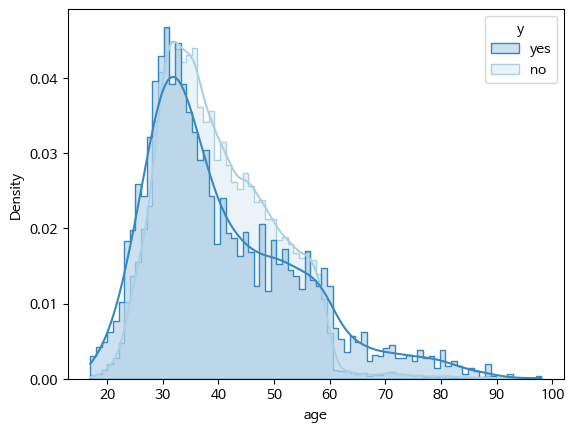

In [ ]:
sns.histplot(data=df, x='age', hue='y',
             common_norm=False,                            # 두 그룹 (가입자 & 비가입자) 간의 분포를 각각 따로 정규화(normalize)하겠다는 의미입니다.
             kde=True, stat='density',                     # 히스토그램과 함께 KDE plot을 함께 그려주는 옵션입니다. stat='density'를 넣지 않으면 y축은 단순 수치로 표기됩니다.
             bins=80,                                      # bin 값을 조정해 줍니다.
             element='step',                               # 두 그룹의 분포를 조금 더 구분되어 보이게 해주는 시각화 모드입니다.
             hue_order=['yes', 'no'], palette='Blues_r')   # hue에 들어간 변수의 순서를 조정해 주고, 팔레트를 설정해 주었습니다.


# 각 그룹의 평균값을 함께 출력해 줍니다.
yes_mean = df.query('y == "yes"')['age'].mean()
no_mean = df.query('y == "no"')['age'].mean()
print(f"yes_mean: {yes_mean:,.2f} \n no_mean: {no_mean:,.2f}")

# 멘토평
기본적인 분석 과정을 충실히 따르고 있습니다. 분석 목표를 명확히 설정하고 예시 분석 질문들을 제시하여 분석 방향성을 잘 잡았습니다. 데이터에 대한 이해도 높으며, 각 컬럼의 의미와 특성을 상세히 설명했습니다. EDA에서는 나이별 정기예금 가입률 분석을 통해 기본적인 패턴을 파악했고, 시각화도 적절히 활용했습니다. 데이터 전처리에서 중복값과 결측값을 확인하고 수치형/범주형 변수를 구분하는 등 기본적인 작업을 수행했습니다. 다만 더 깊이 있는 EDA와 고급 전처리 기법, 체계적인 모델링 과정이 부족한 점이 아쉽습니다. 특히 하이퍼파라미터 튜닝이나 성능 개선을 위한 고급 기법들의 적용이 제한적이어서 모델 성능 최적화 측면에서 개선이 필요합니다.